# AND merge target and indicator

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("../data/BTCUSDT-minute-target-tpsl.csv")
# Temporary solution
import sys
sys.path.insert(0, '..')
import useful_functions as uf
import target as target

In [48]:
len(df)

1988738

In [49]:
# Import indicators
from ta.volatility import UlcerIndex

In [50]:
ui = UlcerIndex(df.close, window=100)
df["ui"] = ui.ulcer_index()

In [51]:
d = df[-5000:]

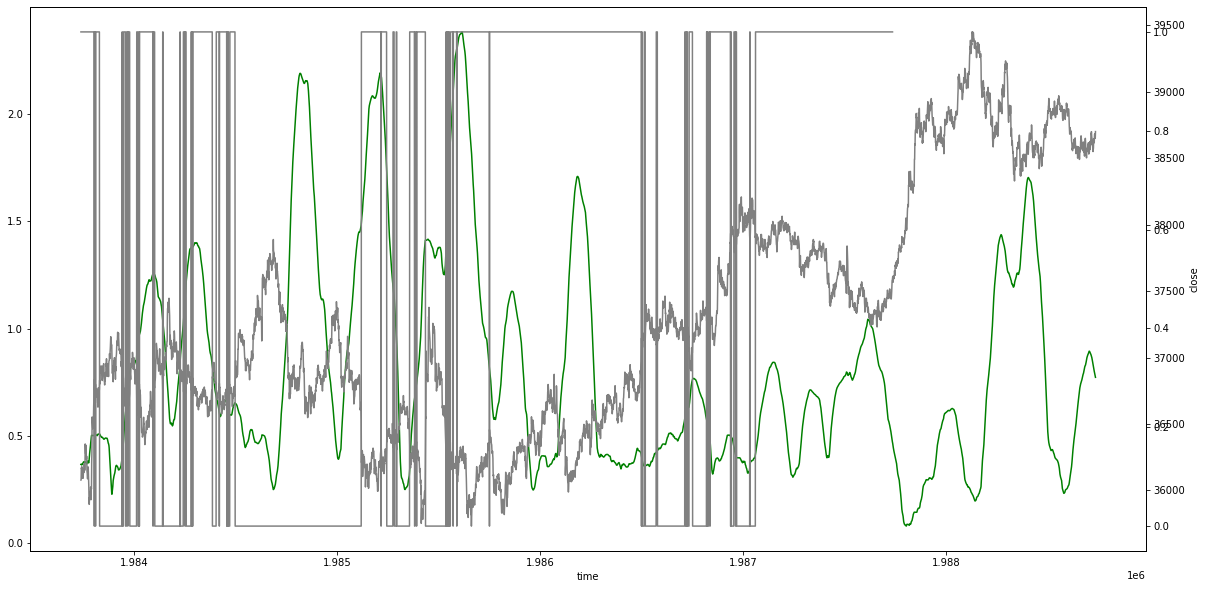

In [52]:
fig,ax = plt.subplots(figsize=(20, 10))
ax.plot(d.ui,
        color="green")
ax.set_xlabel("time")
# ax.set_ylabel("atr")

ax2=ax.twinx()
ax2.plot(d.close,
         color="gray")

ax3=ax.twinx()
ax3.plot(d.target,
         color="gray")

ax2.set_ylabel("close")
plt.show()

(array([ 31690., 212989., 293580., 264724., 213900., 165193., 134031.,
        105227.,  83065.,  65344.,  97676.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.2]),
 <BarContainer object of 11 artists>)

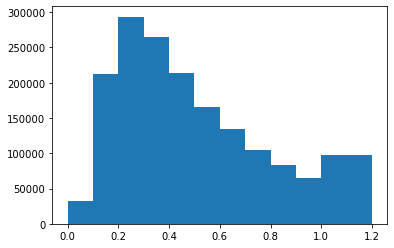

In [53]:
plt.hist(df["ui"], bins=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1., 1.2])

In [54]:
df["target_base"] = df.target
df.target_base.value_counts(), df.target_base.value_counts()[1]/df.target_base.value_counts()[0]

(0.0    1494980
 1.0     492758
 Name: target_base, dtype: int64,
 0.32960842285515524)

In [59]:
df["atr_classified"] = uf.classify(df.ui, 0.9)
df.atr_classified.value_counts(), df.atr_classified.value_counts()[1]/df.atr_classified.value_counts()[0]

(0    1504399
 1     484339
 Name: atr_classified, dtype: int64,
 0.32194849903516287)

In [60]:
df["target"] = target.zip_target(df.target_base, df.atr_classified)
df.target.value_counts(), df.target.value_counts()[1]/df.target.value_counts()[0]

(0.0    1815491
 1.0     173247
 Name: target, dtype: int64,
 0.09542707730305465)

In [61]:
d = df[110000:120000]

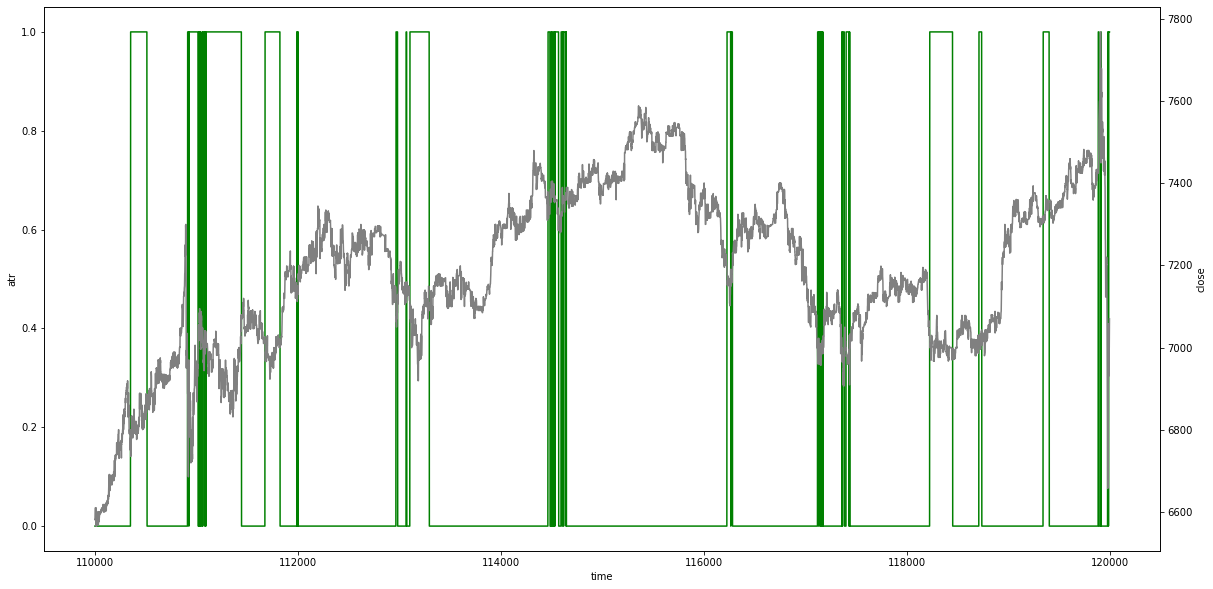

In [62]:
fig,ax = plt.subplots(figsize=(20, 10))
ax.plot(d.target,
        color="green")
ax.set_xlabel("time")
ax.set_ylabel("atr")

ax2=ax.twinx()
ax2.plot(d.close,
         color="gray")

ax2.set_ylabel("close")
# fig.legend(["a", "b", "c", "d"])
plt.show()

In [63]:
df.to_csv("../data/BTCUSDT-minute-target-ui.csv", index=False) #Default